In [1]:
%matplotlib inline

import iris
import iris.quickplot as qplt
#import matplotlib.pyplot as plt

In [2]:
air_temp = iris.load_cube('/home/h05/ithr/git/iris-sample-data/sample_data/A1B_north_america.nc')

print air_temp

air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          Model scenario: A1B
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


writing [iris.fileformats._pyke_rules.compiled_krb]/fc_rules_cf_fc.py
writing [iris.fileformats._pyke_rules.compiled_krb]/compiled_pyke_files.py
/net/home/h05/ithr/git/iris/lib/iris/fileformats/cf.py:1139: UserWarning: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warnings.warn(msg)


/net/home/h05/ithr/git/iris/lib/iris/coords.py:802: UserWarning: Coordinate u'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/net/home/h05/ithr/git/iris/lib/iris/coords.py:802: UserWarning: Coordinate u'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


/data/users/ithr/miniconda/envs/iris/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


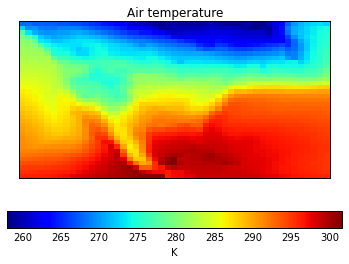

In [6]:
qplt.pcolormesh(air_temp[0])

In [43]:
lats = air_temp.coord('latitude').points
lons = air_temp.coord('longitude').points
times = air_temp.coord('time').points
print 'Latitude:', lats.min(), 'to', lats.max()
print 'Longitude:', lons.min(), 'to', lons.max()
print 'Time:', times.min(), 'to', times.max()

Latitude: 15.0 to 60.0
Longitude: 225.0 to 315.0
Time: -946800.0 to 1118160.0


air_temperature / (K)               (time: 240; latitude: 45; longitude: 70)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          Model scenario: A1B
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


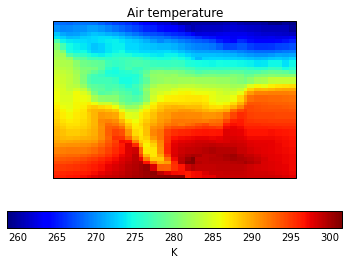

In [26]:
# Cross-product style interpolation
sample_points = [('latitude', range(15, 60)), ('longitude', range(230, 300))]
sampled = air_temp.interpolate(sample_points, iris.analysis.Nearest())
qplt.pcolormesh(sampled[0])
print sampled

air_temperature / (K)               (-- : 50)
     Auxiliary coordinates:
          forecast_period               x
          latitude                      x
          longitude                     x
          time                          x
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          Model scenario: A1B
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


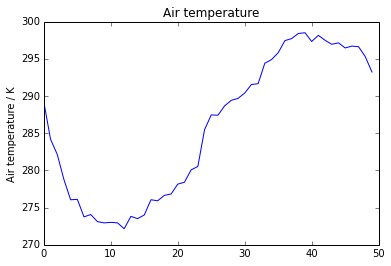

In [92]:
import iris.analysis.trajectory
import numpy as np

circle_path = [('latitude', 40+10*np.sin(np.linspace(0, 2*np.pi))),
               ('longitude', 280+10*np.cos(np.linspace(0, 2*np.pi))),
               ('time', np.linspace(-946800.0, 1118160.0))]
sampled = iris.analysis.trajectory.interpolate(air_temp, circle_path)
qplt.plot(sampled)
print sampled

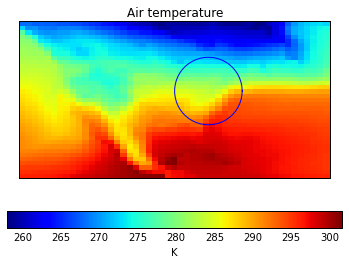

In [97]:
qplt.pcolormesh(air_temp[0])
lons, lats = circle_path[0][1], circle_path[1][1]
_ = qplt.plt.plot(lats, lons, transform=air_temp.coord_system().as_cartopy_crs())

In [76]:
import biggus
b = biggus.NumpyArrayAdapter(np.arange(20).reshape(4, 5) * 10)
print b[[1,1,0,2]].ndarray()
print b[[1,1,0,2], [2, 1, 1, 0, 3]].ndarray()

[[ 50  60  70  80  90]
 [ 50  60  70  80  90]
 [  0  10  20  30  40]
 [100 110 120 130 140]]
[[ 70  60  60  50  80]
 [ 70  60  60  50  80]
 [ 20  10  10   0  30]
 [120 110 110 100 130]]


In [82]:
import dask.array as da
d = da.from_array(np.arange(20).reshape(4, 5) * 10, chunks=(4, 5))
print np.array(d[[1,1,0,2]])
# print np.array(d[[1,1,0,2], [2,1,1,0,3]])
# NotImplementedError: Don't yet support nd fancy indexing

[[ 50  60  70  80  90]
 [ 50  60  70  80  90]
 [  0  10  20  30  40]
 [100 110 120 130 140]]
